In [1]:
# Mahipalsing Assignments

In [2]:
# Imoprt Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
# Load data sets
Fraud_check = pd.read_csv("/Users/mayur/Desktop/Excelr Solution/Assignment-14(Decision Trees)/Fraud_check.csv")
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
Fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [6]:
#Fraud_check.loc[Fraud_check["Taxable.Income"]!="Good","Taxable_Income"]="Risky"
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"

In [7]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


# Label Encoding

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"])

In [10]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [11]:
Fraud_check.drop(['City.Population'],axis=1,inplace=True)
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)

In [12]:
Fraud_check["Taxable_Income"].unique()

array([1, 0])

In [13]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,1
1,1,0,18,1,1
2,0,1,30,1,1
3,1,2,15,1,1
4,0,1,28,0,1
...,...,...,...,...,...
595,1,0,7,1,1
596,1,0,2,1,1
597,0,0,0,1,1
598,1,1,17,0,1


In [14]:
# Define x 
x = Fraud_check.iloc[:,0:4]
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [15]:
# Define y
y = y = Fraud_check["Taxable_Income"]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int32

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
model.get_n_leaves()

168

In [19]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    93
0    27
dtype: int64

In [20]:
preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [21]:
# Accuracy 
np.mean(preds==y_test)

0.6416666666666667

In [22]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.21      0.22      0.22        27
           1       0.77      0.76      0.77        93

    accuracy                           0.64       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.65      0.64      0.64       120



# Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
model_gini.get_n_leaves()

172

In [26]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    90
0    30
dtype: int64

In [27]:
preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [28]:
# Accuracy 
np.mean(preds==y_test)

0.6166666666666667

In [29]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.21      0.20      0.21        30
           1       0.74      0.76      0.75        90

    accuracy                           0.62       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.61      0.62      0.61       120



# Building Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
preds = model_R.predict(x_test) 

In [33]:
np.mean(preds==y_test)

0.525

# Plot Tree Diagram

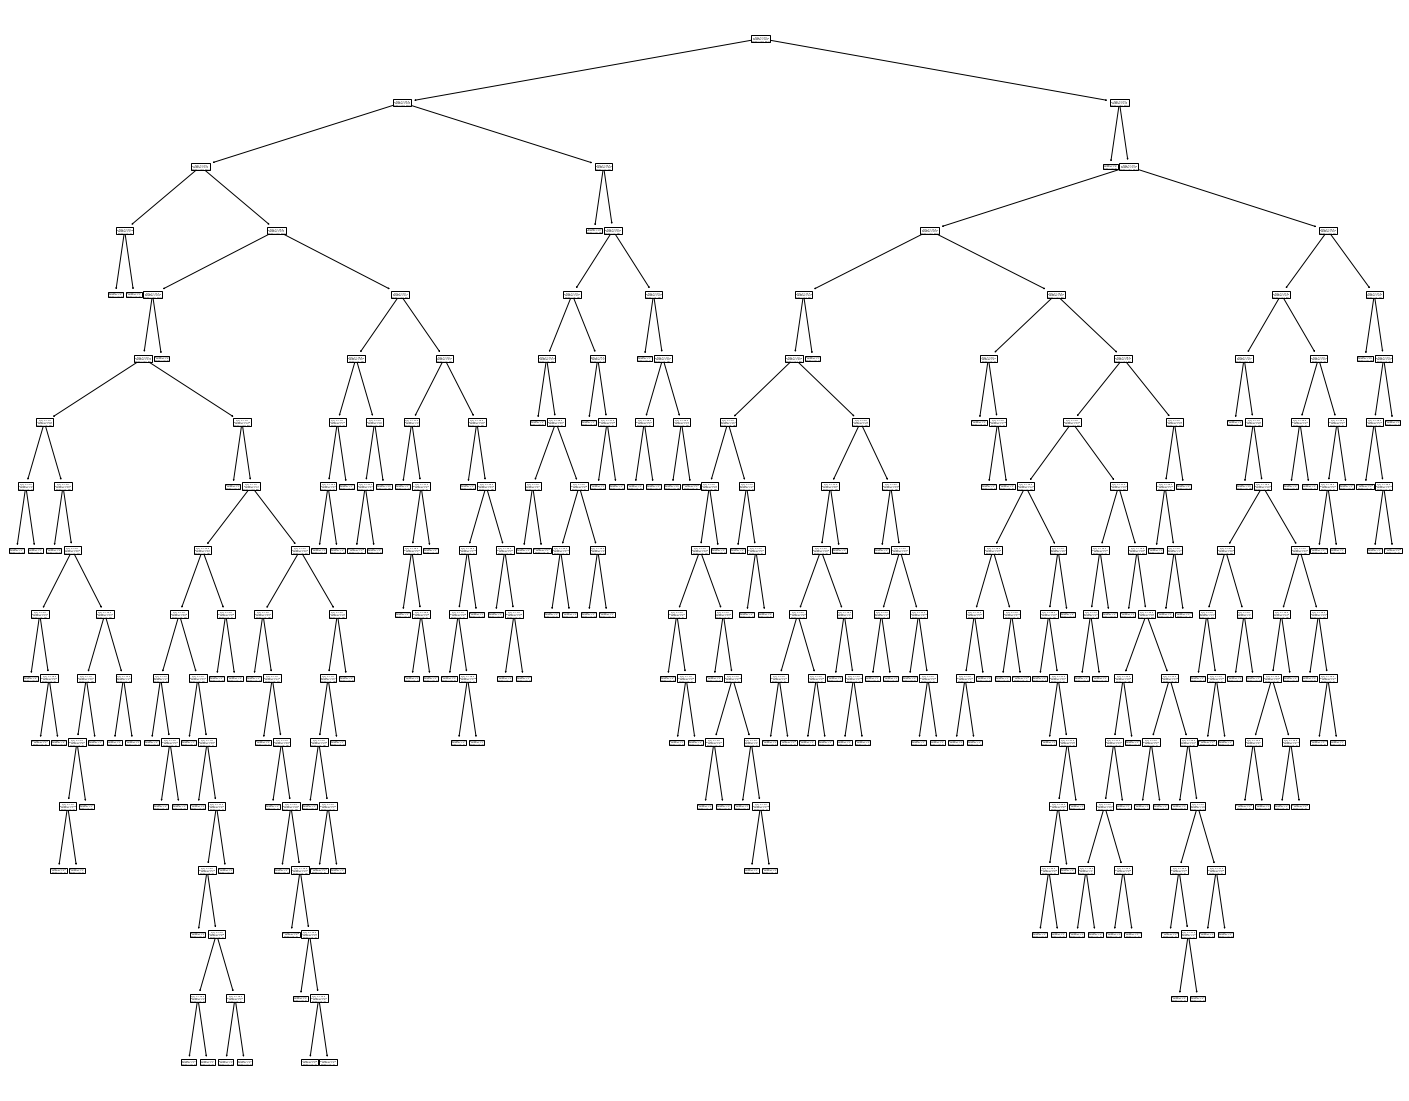

In [34]:
# Decision Tree Classifier using Entropy Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model)

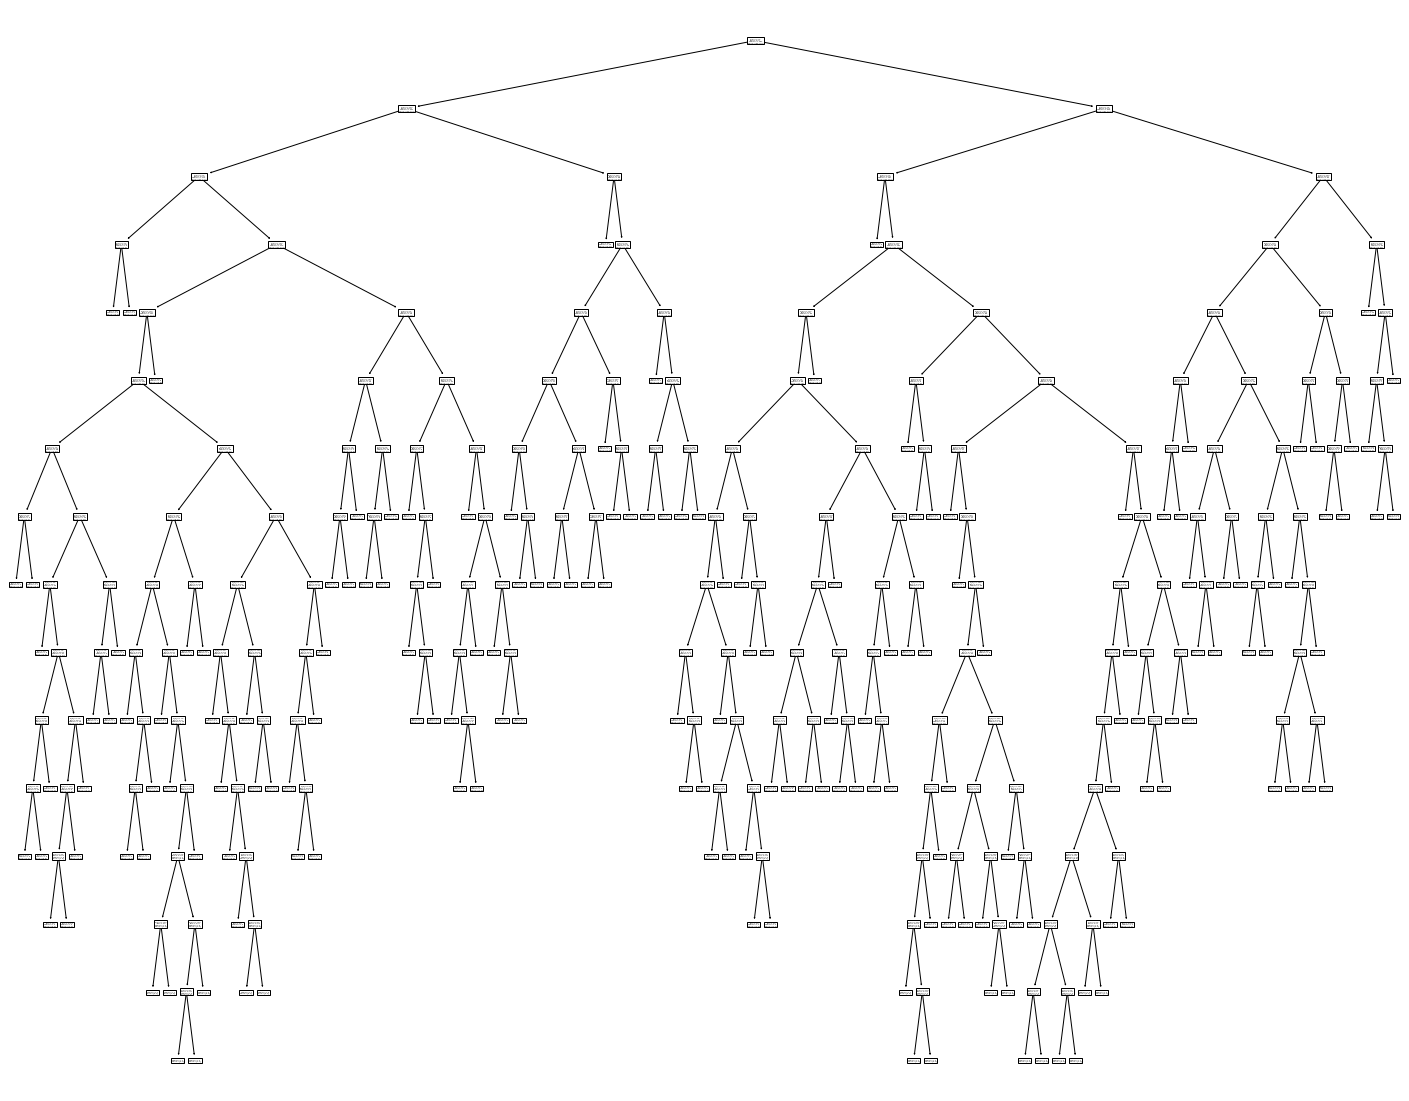

In [35]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini)

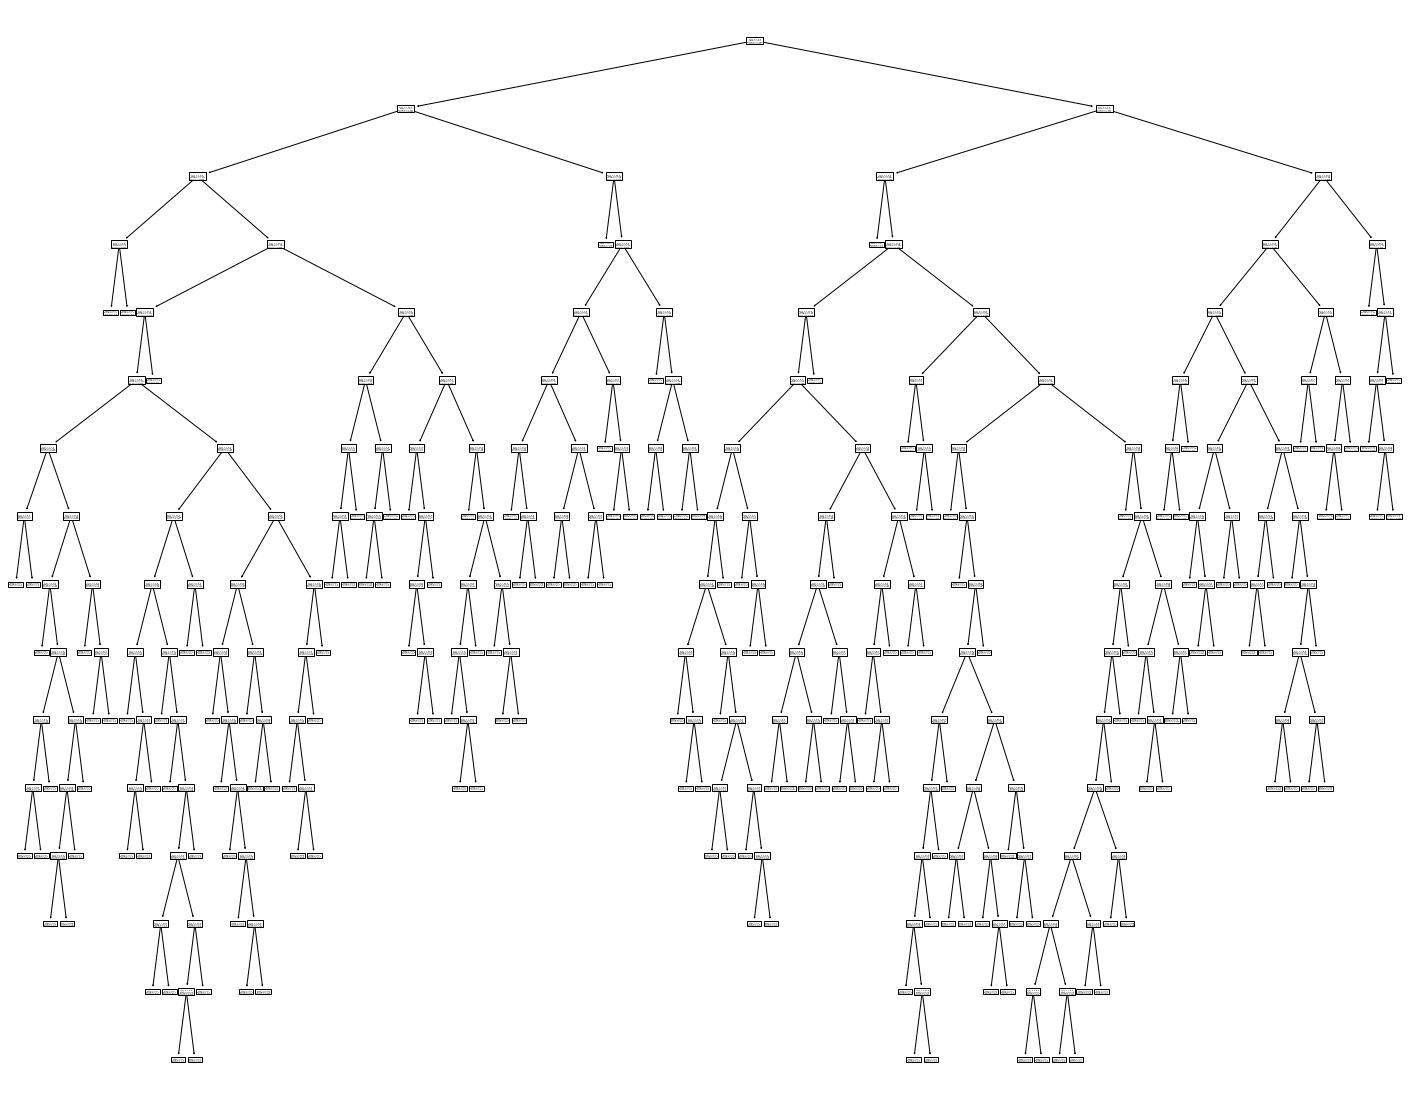

In [36]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)